/Users/alejandromorales/Documents/school/deep-learning/dl-final/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


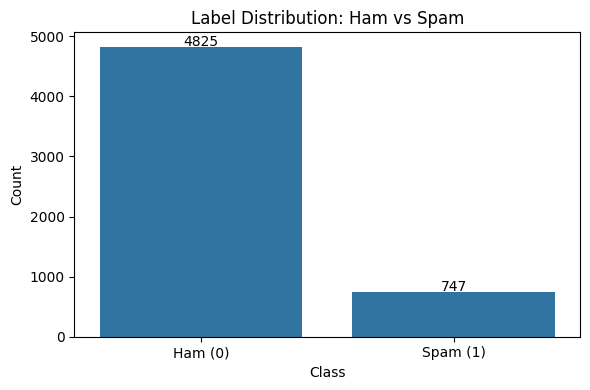

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.data_process import download_data

def plot_label_distribution(df):
    """
    Plot the distribution of labels in the dataset to visualize class imbalance.
    Assumes 'labels' column is already mapped to 0 (ham) and 1 (spam).
    """
    counts = df['labels'].value_counts().sort_index()
    labels = ['Ham (0)', 'Spam (1)']

    plt.figure(figsize=(6, 4))
    sns.barplot(x=labels, y=counts.values)
    plt.title("Label Distribution: Ham vs Spam")
    plt.ylabel("Count")
    plt.xlabel("Class")
    for i, count in enumerate(counts.values):
        plt.text(i, count + 20, str(count), ha='center')
    plt.tight_layout()
    plt.show()
    

# Download data from Kaggle
path = download_data()
 
df = pd.read_csv(f"{path}/spam.csv", encoding='latin-1')[['v1', 'v2']]
df.rename(columns={'v1': 'labels', 'v2': 'examples'}, inplace=True)
df['labels'] = df['labels'].map({'ham': 0, 'spam': 1})

plot_label_distribution(df)
